# Project 2: Wine Quality Prediction

## 1. Project Description

### Data

The wine quality data includes two datasets:
- winequality-red.csv - red wine preference samples
- winequality-white.csv - white wine preference samples

The notes of the authors who mined this data are:
"The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods."

#### **Features Available:**

**Input variables (based on physicochemical tests):**
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol

**Output variable (based on sensory data):**
- quality (score between 0 and 10)

The dataset is originally mined "to predict human wine taste preferences that is based on easily available analytical tests at the certification step," (Cortez et al., 2009). The inputs include objective tests (e.g. PH values) and the output is based on sensory data (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality between 0 (very bad) and 10 (very excellent). The researchers state that if a successful model can be build using the available data, this will support the oenologist wine tasting evaluations and improve wine production. They also prpose that these types of models can further help with marketing as we can also model consumer tastes.

However, my specific reason to choose this dataset is that I was presented with this dataset during the technical interview of a data scientist position I applied to, and they asked me to predict the quality of a wine. That interview was timed, and I wasn't happy with what I achieved in the end. Doing this project, I wanted to see if I can train the models better when I have more time 😅

On the website of the datasets, it is mentioned that "the data can be used to test (ordinal) regression or classification (in effect, this is a multi-class task, where the clases are ordered) methods. Other research issues are feature selection and outlier detection." Besides, this is a multivariate dataset with 4898 instances (red wine - 1599; white wine - 4898) and 12 features (1 categorical, 10 numerical + the quality feature). So, it is perfectly suitable for my aim of training a model to predict the red and white wine quality.

**Reference:** 

_This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
Please include this citation if you plan to use this database:_

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems>, Elsevier, 47(4):547-553. ISSN: 0167-9236.

**Available at:** \
[@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016 \
[Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf \
[bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

## 2. Packages

In [236]:
%matplotlib inline
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import pylab
pylab.rcParams["figure.figsize"] = (5.0, 4.0)
from collections import Counter
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
import graphviz
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from pprint import pprint
from time import time
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## 3. Data Preparation

In [2]:
#Because the values are seperated by ";" instead of ",", I am passing a new parameter
red = pd.read_csv("localonly/winequality/winequality-red.csv", header = 0, sep = ";" )
white = pd.read_csv("localonly/winequality/winequality-white.csv", header = 0, sep = ";" )

In [3]:
red.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
white.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [5]:
len(red)

1599

In [6]:
len(white)

4898

The classes are not balanced. I should take this into account during the modeling process. Also, both datasets are coming from the same source. The format of the dataset, and the column names are the same. However, to create one big dataset that includes all wine types, to not to lose the wine type information, I will create a wine type feature. Later, I will also change the order of the columns and the names of the columns for better efficiency.

In [7]:
str_red = ["Red" for x in range(1599)]
str_white = ["White" for x in range(4898)]

In [8]:
white['type'] = str_white
red['type'] = str_red

In [9]:
white.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality   type  
0      8.8        6  White  
1      9.5        6  White  
2     10.1        6  White  
3      9.9        6  White  
4      9.9        6  White

In [10]:
red.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type  
0      9.4        5  Red  
1      9.8        5  Red  
2      9.8        5  Red  
3      9.8        6  Red  
4      9.4        5  Red

In [11]:
wine = red.append(white, ignore_index=True)

In [12]:
wine.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type  
0      9.4        5  Red  
1      9.8        5  Red  
2      9.8        5  Red  
3      9.8        6  Red  
4      9.4        5  Red

In [13]:
len(wine)

6497

I will encode the wine types numerically:

In [14]:
mapping = {'White':1,
           'Red':0}
wine['type'] = wine.type.map(mapping)

In [15]:
wine.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  type  
0      9.4        5     0  
1      9.8        5     0  
2      9.8        5     0  
3      9.8        6     0  
4      9.4        5     0

In [16]:
wine = wine.rename(columns={"fixed acidity":"fixed_acidity",
                            "volatile acidity": "volatile_acidity",
                            "citric acid": "citric_acid",
                            "residual sugar": "residual_sugar",
                            "free sulfur dioxide": "free_so2",
                            "total sulfur dioxide": "total_so2"
                           })
wine.head(5)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_so2  total_so2  density    pH  sulphates  alcohol  quality  type  
0      11.0       34.0   0.9978  3.51       0.56      9.4        5     0  
1      25.0       67.0   0.9968  3.20       0.68      9.8        5     0  
2      15.0       54.0   0.9970  3.26       0.65      9.8        5     0  
3      17.0       60.0   0.9980  3.16       0.58      9.8        6     0  
4      11.0       34.0   0.9978  3.51       0.56      9.4        5     0

**Checking the missing values:**

In [17]:
null_sum = wine.isnull().sum()
null_sum

fixed_acidity       0
volatile_acidity    0
citric_acid         0
residual_sugar      0
chlorides           0
free_so2            0
total_so2           0
density             0
pH                  0
sulphates           0
alcohol             0
quality             0
type                0
dtype: int64

**Checking the data types:**

In [18]:
wine.dtypes 

fixed_acidity       float64
volatile_acidity    float64
citric_acid         float64
residual_sugar      float64
chlorides           float64
free_so2            float64
total_so2           float64
density             float64
pH                  float64
sulphates           float64
alcohol             float64
quality               int64
type                  int64
dtype: object

We know that our "type" feature is categorical. So, I will convert that feature into categorical type. I was initially planning to conver the quality feature to categorical data too; however, I decided that statistical descriptions of that column (such as the mean quality score etc.) can be usuful when determining whether wine type or other features differentiate the data. So, I will keep that feature numerical.

In [19]:
wine["type"] = wine["type"].astype('category')

In [20]:
wine.dtypes 

fixed_acidity        float64
volatile_acidity     float64
citric_acid          float64
residual_sugar       float64
chlorides            float64
free_so2             float64
total_so2            float64
density              float64
pH                   float64
sulphates            float64
alcohol              float64
quality                int64
type                category
dtype: object

**Checking the statistical descriptions:**

In [21]:
wine.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides     free_so2    total_so2      density           pH  \
count  6497.000000  6497.000000  6497.000000  6497.000000  6497.000000   
mean      0.056034    30.525319   115.744574     0.994697     3.218501   
std       0.035034    17.749400    56.521855     0.002999     0.160787   
min       0.009000     1.000000     6.000000     0.987110     2.720000   
25%       0.038000    17.000000    77.000000     0.992340     3.110000   
50%       0.047000    29.000000   118.000000     0.994890     3.210000   
75%       0.065000    41.000000   156.000000     0.996990     3.320000   
max       0.611000   289.000000   440.000000     1.038980     4.010000   

         sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  
mean      0.531268    10.491801     5.818378  
std       0.148806     1.192712     0.873255  
min       0.220000     8.000000     3.000000  
25%       0.430000     9.500000     5.000000  
50%       0.510000    10.300000     6.000000  
75%       0.600000    11.300000     6.000000  
max       2.000000    14.900000     9.000000

In [22]:
wine.quality.describe()

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [23]:
#white wine description

In [24]:
wine.groupby(["type"]).quality.describe()

count      mean       std  min  25%  50%  75%  max
type                                                     
0     1599.0  5.636023  0.807569  3.0  5.0  6.0  6.0  8.0
1     4898.0  5.877909  0.885639  3.0  5.0  6.0  6.0  9.0

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

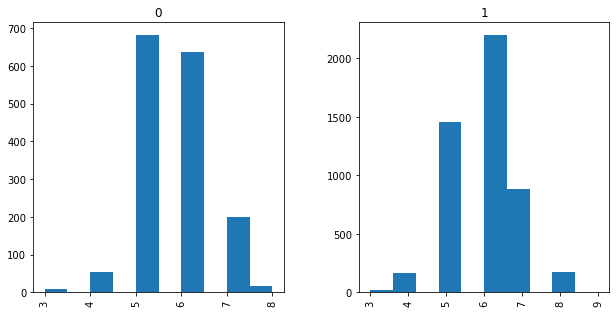

In [25]:
wine.hist(column = "quality", by="type", bins=10, figsize = (10, 5))

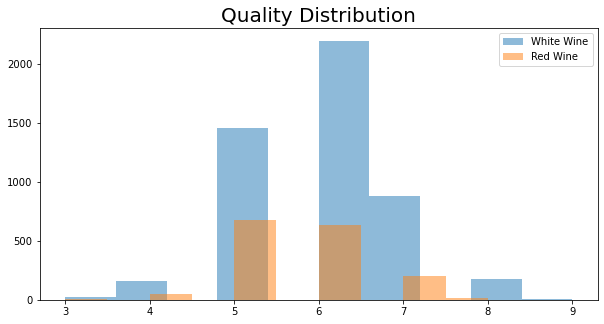

In [26]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.hist(wine[wine['type'] == 1]['quality'],
         alpha=0.5,
         label='White Wine')
 
plt.hist(wine[wine['type'] == 0]['quality'],
         alpha=0.5,
         label='Red Wine')
 
plt.legend(loc='upper right')
plt.title('Quality Distribution', fontsize =20)
plt.show()

We can see that when grouped by the wine type ("white" or "red"), the distribution of the wine quality does not change a lot. The number of the instances are different in both types. However, when we check the individual distributions and also the descriptive statistics of the types, we can see that the only thing that sticks out is the unbalanced distribtuion of the wine types.

**Checking the correlations of the features:**

In [27]:
corrmat = wine.corr()
print(corrmat)

                  fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity          1.000000          0.219008     0.324436   
volatile_acidity       0.219008          1.000000    -0.377981   
citric_acid            0.324436         -0.377981     1.000000   
residual_sugar        -0.111981         -0.196011     0.142451   
chlorides              0.298195          0.377124     0.038998   
free_so2              -0.282735         -0.352557     0.133126   
total_so2             -0.329054         -0.414476     0.195242   
density                0.458910          0.271296     0.096154   
pH                    -0.252700          0.261454    -0.329808   
sulphates              0.299568          0.225984     0.056197   
alcohol               -0.095452         -0.037640    -0.010493   
quality               -0.076743         -0.265699     0.085532   

                  residual_sugar  chlorides  free_so2  total_so2   density  \
fixed_acidity          -0.111981   0.298195 -0.282735  -0.32905

Correlations for the label value:

In [28]:
corrmat2 = corrmat["quality"].sort_values(ascending = False)
print(corrmat2)

quality             1.000000
alcohol             0.444319
citric_acid         0.085532
free_so2            0.055463
sulphates           0.038485
pH                  0.019506
residual_sugar     -0.036980
total_so2          -0.041385
fixed_acidity      -0.076743
chlorides          -0.200666
volatile_acidity   -0.265699
density            -0.305858
Name: quality, dtype: float64


In [29]:
corrmat_abs = abs(corrmat["quality"]).sort_values(ascending = False)
print(corrmat_abs)

quality             1.000000
alcohol             0.444319
density             0.305858
volatile_acidity    0.265699
chlorides           0.200666
citric_acid         0.085532
fixed_acidity       0.076743
free_so2            0.055463
total_so2           0.041385
sulphates           0.038485
residual_sugar      0.036980
pH                  0.019506
Name: quality, dtype: float64


Alcohol, density, volatile acidity, and chlorides appear to large impact on wine quality. 

Let's visualize the correlations between different variables to see if we will encounter into multicollinearity issue:

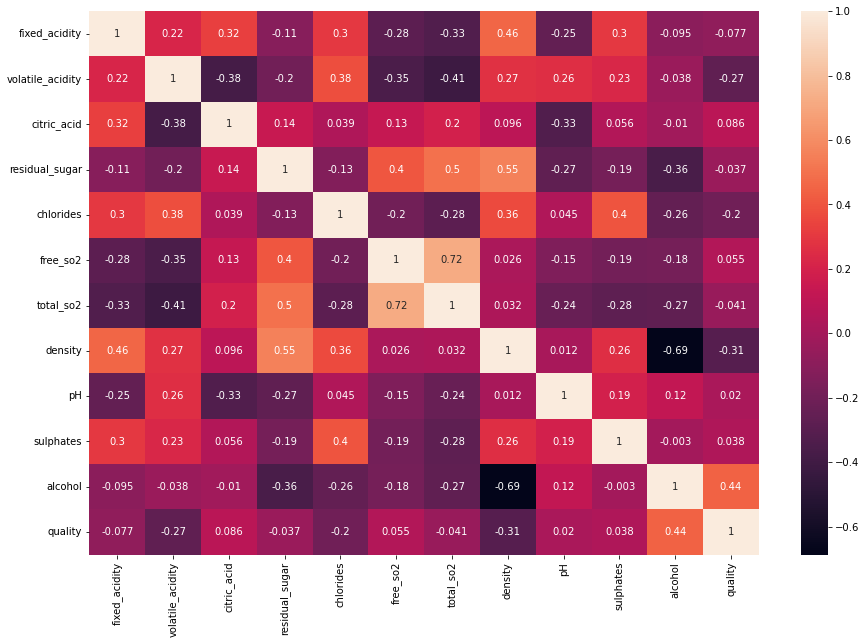

In [30]:
corrmat3 = wine.corr(method='pearson')

plt.figure(figsize=(15, 10))
sns.heatmap(corrmat3, annot=True)
plt.show()

We can see that there are highly correlated features in the dataset. This may cause multicollinearity problems, such as reducing the power of coefficients and weakening the liability of the p-values to identify the significant independent variables. So, we may want to identify these features and go into feature selection process.

**Feature Selection:**

In [31]:
cols = wine.columns.tolist()

In [32]:
cols = cols[-1:] + cols[:-1]
cols

['type',
 'fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_so2',
 'total_so2',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [33]:
df = wine[cols]
df.head(1)

type  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0    0            7.4               0.7          0.0             1.9   

   chlorides  free_so2  total_so2  density    pH  sulphates  alcohol  quality  
0      0.076      11.0       34.0   0.9978  3.51       0.56      9.4        5

In [34]:
def vif_scores(df):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = df.columns
    VIF_Scores["VIF Scores"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return VIF_Scores
df1 = df.iloc[:,:-1]
vif_scores(df1)

Independent Features   VIF Scores
0                  type    20.656384
1         fixed_acidity    71.390677
2      volatile_acidity    11.258133
3           citric_acid     9.388837
4        residual_sugar     3.576180
5             chlorides     5.850072
6              free_so2     8.720363
7             total_so2    20.527867
8               density  1159.930636
9                    pH   661.465549
10            sulphates    20.095312
11              alcohol   111.634942

We can see that density feature have extremely high VIF (variance inflation factor), which assesses how much the variance of an estimated regression coefficient increases if the predictors are correlated. Usually it is suggested to remove features with more than 10 VIF scores. However, as much as we care about the significances of the independent variables in regression models, our main goal is to perform predictions. We know that multicollinearity  impacts the p-values and the coefficients of the features, yet it does not affect the predictions. Also, given that we will perform ridge regression (which will give biased but low-on-variance estimates), we can drop only the feature with extremely high VIF and not every feature with >10 VIFs.

In [35]:
df = df.drop(["density"], axis=1).reset_index(drop=True)
df1 = df.iloc[:,:-1]
vif_scores(df1)

Independent Features  VIF Scores
0                  type   16.686086
1         fixed_acidity   43.368082
2      volatile_acidity   11.045079
3           citric_acid    9.382602
4        residual_sugar    3.326986
5             chlorides    5.479790
6              free_so2    8.689003
7             total_so2   20.527842
8                    pH  145.215926
9             sulphates   20.088176
10              alcohol  102.941873

We can see that even dropping these two features greatly impacted the VIF scores.

**Formatting the quality feature:**

I will store the data without the type feature as a different object:

In [36]:
data = df.drop(["type"], axis=1).reset_index(drop=True)

In [37]:
cols_n = data.columns.tolist()
cols_n = cols_n[-1:] + cols_n[:-1]
data = data[cols_n]

In [38]:
cnts = data['quality'].value_counts()
cnts

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

No handles with labels found to put in legend.


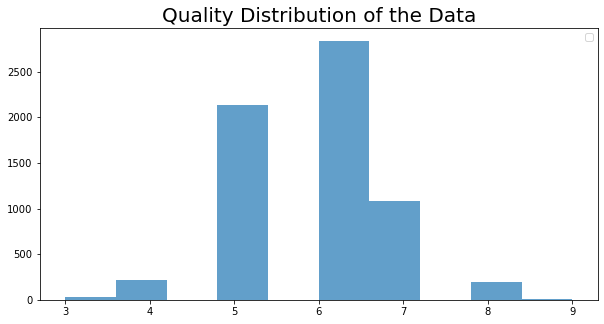

In [39]:
plt.hist(data['quality'],
         alpha=0.7)
 
plt.legend(loc='upper right')
plt.title('Quality Distribution of the Data', fontsize =20)
plt.show()

In [40]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [41]:
outliers = find_outliers_IQR(data["quality"])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

number of outliers: 228
max outlier value: 9
min outlier value: 3


From the histogram and also the outlier calcualtions, we can see that there are the 3 and 9 quality wines are really rare. In the dataset description, the authors also talk about how there are mostly mid-quality wines and there are so few high and low quality wines. As there are over 6400 indices, removing the minimum and maximum quality scores will only remove ~%0.5 of the data.

In [42]:
len(data)

6497

In [43]:
index_out = data[ (data['quality'] <= 3) | (data['quality'] >= 9) ].index

In [44]:
len(index_out)

35

In [45]:
data.drop(index_out , inplace=True)

In [50]:
data["quality"] = data["quality"].astype('float64')

**Final dataframe:**

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6462 entries, 0 to 6496
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   quality           6462 non-null   float64
 1   fixed_acidity     6462 non-null   float64
 2   volatile_acidity  6462 non-null   float64
 3   citric_acid       6462 non-null   float64
 4   residual_sugar    6462 non-null   float64
 5   chlorides         6462 non-null   float64
 6   free_so2          6462 non-null   float64
 7   total_so2         6462 non-null   float64
 8   pH                6462 non-null   float64
 9   sulphates         6462 non-null   float64
 10  alcohol           6462 non-null   float64
dtypes: float64(11)
memory usage: 605.8 KB


In [52]:
data.shape

(6462, 11)

In [53]:
data.describe()

quality  fixed_acidity  volatile_acidity  citric_acid  \
count  6462.000000    6462.000000       6462.000000  6462.000000   
mean      5.829000       7.212187          0.338875     0.318756   
std       0.849633       1.293678          0.163025     0.145197   
min       4.000000       3.800000          0.080000     0.000000   
25%       5.000000       6.400000          0.230000     0.250000   
50%       6.000000       7.000000          0.290000     0.310000   
75%       6.000000       7.700000          0.400000     0.390000   
max       8.000000      15.900000          1.330000     1.660000   

       residual_sugar    chlorides     free_so2    total_so2           pH  \
count     6462.000000  6462.000000  6462.000000  6462.000000  6462.000000   
mean         5.445667     0.055959    30.482745   115.715181     3.218250   
std          4.759027     0.034843    17.324086    56.170743     0.160533   
min          0.600000     0.009000     1.000000     6.000000     2.720000   
25%          1.800000     0.038000    17.000000    78.000000     3.110000   
50%          3.000000     0.047000    29.000000   118.000000     3.210000   
75%          8.100000     0.065000    41.000000   156.000000     3.320000   
max         65.800000     0.611000   138.500000   344.000000     4.010000   

         sulphates      alcohol  
count  6462.000000  6462.000000  
mean      0.531435    10.491780  
std       0.148927     1.192298  
min       0.220000     8.000000  
25%       0.430000     9.500000  
50%       0.510000    10.300000  
75%       0.600000    11.300000  
max       2.000000    14.900000

In [54]:
data.head(5)

quality  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0      5.0            7.4              0.70         0.00             1.9   
1      5.0            7.8              0.88         0.00             2.6   
2      5.0            7.8              0.76         0.04             2.3   
3      6.0           11.2              0.28         0.56             1.9   
4      5.0            7.4              0.70         0.00             1.9   

   chlorides  free_so2  total_so2    pH  sulphates  alcohol  
0      0.076      11.0       34.0  3.51       0.56      9.4  
1      0.098      25.0       67.0  3.20       0.68      9.8  
2      0.092      15.0       54.0  3.26       0.65      9.8  
3      0.075      17.0       60.0  3.16       0.58      9.8  
4      0.076      11.0       34.0  3.51       0.56      9.4

**The dataset is ready to use!**

## 4. Models

**2 regression models,1 decision tree regressor, 1 random forest regressor, and 1 support vector regression model**

**Splitting the data into test and training sets**

In [55]:
training_set, testing_set = train_test_split(data, test_size = 0.25, random_state = 2023)

In [56]:
# training set
X_train = training_set.values[:,1:]
y_train = training_set.values[:,0]

In [57]:
# testing set
X_test = testing_set.values[:,1:]
y_test = testing_set.values[:,0]

In [58]:
sc = StandardScaler()

In [59]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [60]:
# running example after splitting
X_train.shape, X_test.shape

((4846, 10), (1616, 10))

## A. Regression Models

## a. Linear Regression

### i.

In [239]:
reg1 = LinearRegression()

In [240]:
reg1.fit(X_train, y_train)

LinearRegression()

In [241]:
np.round(reg1.score(X_test, y_test), 3)

0.302

In [242]:
reg1.coef_

array([ 0.02891392, -0.22231904, -0.00393909,  0.10364528, -0.0235458 ,
        0.12204607, -0.12913502,  0.02976883,  0.08265922,  0.39358236])

In [243]:
reg1.intercept_

5.826661163846471

In [244]:
y_pred = reg1.predict(X_test)

In [246]:
print("mae: " + str(mean_absolute_error(y_test, y_pred)))
print("mse: " + str(mean_squared_error(y_test, y_pred)))
print("accuracy: " + str(reg1.score(X_test, y_test)))
print("r2: " + str(r2_score(y_test, y_pred)))

mae: 0.5464401179084826
mse: 0.4879022811810395
accuracy: 0.30197484001422603
r2: 0.30197484001422603


### ii.

In [247]:
reg2 = LinearRegression(fit_intercept=False, positive=True)

In [248]:
reg2.fit(X_train, y_train)

LinearRegression(fit_intercept=False, positive=True)

In [249]:
np.round(reg2.score(X_test, y_test), 3)

-48.425

In [250]:
reg2.coef_

array([0.        , 0.        , 0.06457317, 0.08967053, 0.        ,
       0.10318932, 0.        , 0.00980793, 0.06256422, 0.43452228])

In [251]:
reg2.intercept_

0.0

In [252]:
y_pred = reg2.predict(X_test)

In [253]:
print("mae: " + str(mean_absolute_error(y_test, y_pred)))
print("mse: " + str(mean_squared_error(y_test, y_pred)))
print("accuracy: " + str(reg2.score(X_test, y_test)))
print("r2: " + str(r2_score(y_test, y_pred)))

mae: 5.832263069493687
mse: 34.54671945808049
accuracy: -48.42481375233095
r2: -48.42481375233095


### iii. Hyper-parameter tunned model using GridSearchCV 

In [77]:
reg = LinearRegression()
parameters = {'fit_intercept':[True, False], 
              'positive':[True, False]} # 2*2 = 4 combinations

grid_cv = GridSearchCV(estimator = reg, param_grid = parameters, cv=5)

grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'positive': [True, False]})

In [78]:
sorted(grid_cv.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_fit_intercept',
 'param_positive',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [79]:
grid_cv.cv_results_# best_params_

{'mean_fit_time': array([0.0028265 , 0.00238667, 0.00114293, 0.00112801]),
 'std_fit_time': array([0.00131499, 0.00042875, 0.00012924, 0.00024743]),
 'mean_score_time': array([0.00058212, 0.00053072, 0.00024014, 0.000348  ]),
 'std_score_time': array([3.40852847e-04, 2.06044255e-04, 9.95596706e-06, 1.56210689e-04]),
 'param_fit_intercept': masked_array(data=[True, True, False, False],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_positive': masked_array(data=[True, False, True, False],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'fit_intercept': True, 'positive': True},
  {'fit_intercept': True, 'positive': False},
  {'fit_intercept': False, 'positive': True},
  {'fit_intercept': False, 'positive': False}],
 'split0_test_score': array([  0.2872022 ,   0.31792873, -44.80097927, -44.79821986]),
 'split1_test_score': array([  0.23534754,   0.29600044, -48.31

In [80]:
grid_cv.best_params_

{'fit_intercept': True, 'positive': False}

In [81]:
grid_cv.best_score_

0.29057962477129406

We can see that using GridSearchCV does not increase the scores

A post I saw online explains this process as:

"In your first model, you are performing cross-validation. When cv=None, or when it not passed as an argument, GridSearchCV will default to cv=3. With three folds, each model will train using 66% of the data and test using the other 33%. Since you already split the data in 70%/30% before this, each model built using GridSearchCV uses about 0.7*0.66=0.462 (46.2%) of the original data.

In your second model, there is no k-fold cross-validation. You have a single model that is trained on 70% of the original data, and tested on the remaining 30%. Since the model has been given much more data, a higher score is as expected.

In your last model, you train another single model on 70% of the data. However this time you do not test it using the 30% of the data you saved for testing. As you suspected, you are looking at the training error, not the testing error. It is almost always the case that the training error is better than the test error, so the higher score is, again, as expected."

[link to source](https://stats.stackexchange.com/questions/153131/gridsearchcv-regression-vs-linear-regression-vs-stats-model-ols)

So, I decided to apply the best parameter settings found with GSV to the actual model, apart from the GSV model.

### iv.

In [254]:
reg4 = LinearRegression(fit_intercept=True, positive=False)

In [255]:
reg4.fit(X_train, y_train)

LinearRegression()

In [256]:
np.round(reg4.score(X_test, y_test), 3)

0.302

In [257]:
reg4.coef_

array([ 0.02891392, -0.22231904, -0.00393909,  0.10364528, -0.0235458 ,
        0.12204607, -0.12913502,  0.02976883,  0.08265922,  0.39358236])

In [258]:
reg4.intercept_

5.826661163846471

In [259]:
y_pred = reg4.predict(X_test)

In [260]:
print("mae: " + str(mean_absolute_error(y_test, y_pred)))
print("mse: " + str(mean_squared_error(y_test, y_pred)))
print("accuracy: " + str(reg4.score(X_test, y_test)))
print("r2: " + str(r2_score(y_test, y_pred)))

mae: 0.5464401179084826
mse: 0.4879022811810395
accuracy: 0.30197484001422603
r2: 0.30197484001422603


We can see that the best features selected are actually the default settings of these parameters. So, the best performing model is the reg1 model or the GridSearchV found model.

## b. Ridge Regression

### i.

In [261]:
# aplha = 0.1, 1, 10
reg_1 = Ridge(alpha=10)

In [262]:
reg_1.fit(X_train, y_train)

Ridge(alpha=10)

In [263]:
reg_1.score(X_test, y_test)

0.30191658425873724

In [264]:
reg_1.coef_

array([ 0.02850127, -0.22149369, -0.00346473,  0.10284942, -0.02395173,
        0.12132101, -0.12830887,  0.02957791,  0.08253261,  0.39248966])

In [265]:
reg_1.intercept_

5.826661163846471

In [266]:
y_pred = reg4.predict(X_test)

In [267]:
print("mae: " + str(mean_absolute_error(y_test, y_pred)))
print("mse: " + str(mean_squared_error(y_test, y_pred)))
print("accuracy: " + str(reg_1.score(X_test, y_test)))
print("r2: " + str(r2_score(y_test, y_pred)))

mae: 0.5464401179084826
mse: 0.4879022811810395
accuracy: 0.30191658425873724
r2: 0.30197484001422603


### ii.

In [268]:
reg_2 = Ridge(alpha=0.1)

In [269]:
reg_2.fit(X_train, y_train)

Ridge(alpha=0.1)

In [270]:
reg_2.score(X_test, y_test)

0.3019742813151124

In [271]:
reg_2.coef_

array([ 0.02890976, -0.22231074, -0.00393431,  0.10363728, -0.02354989,
        0.12203877, -0.12912671,  0.02976691,  0.08265797,  0.39357139])

In [272]:
reg_2.intercept_

5.826661163846471

In [273]:
y_pred = reg4.predict(X_test)

In [274]:
print("mae: " + str(mean_absolute_error(y_test, y_pred)))
print("mse: " + str(mean_squared_error(y_test, y_pred)))
print("accuracy: " + str(reg_2.score(X_test, y_test)))
print("r2: " + str(r2_score(y_test, y_pred)))

mae: 0.5464401179084826
mse: 0.4879022811810395
accuracy: 0.3019742813151124
r2: 0.30197484001422603


### iii. Hyper-parameter tunned model using GridSearchCV

In [144]:
rid = Ridge()
parameters = {'alpha':[0.1, 0.5, 1, 5, 10],
              'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']}

grid_cv = GridSearchCV(estimator = rid, param_grid = parameters, cv=5)

grid_cv.fit(X_train, y_train)

/Users/sukaraca/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sukaraca/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sukaraca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/Users/sukaraca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/Users/sukaraca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueE

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 0.5, 1, 5, 10],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga', 'lbfgs']})

In [145]:
grid_cv.cv_results_# best_params_

{'mean_fit_time': array([0.00253544, 0.00223403, 0.00116429, 0.00162659, 0.00168915,
        0.0052248 , 0.00325599, 0.00049052, 0.00054946, 0.00120606,
        0.00051861, 0.00096765, 0.00134239, 0.00488305, 0.0033164 ,
        0.00044684, 0.00061259, 0.00092134, 0.00057058, 0.00094676,
        0.00103579, 0.00475755, 0.00343504, 0.00043478, 0.00053759,
        0.00084682, 0.00051422, 0.00100884, 0.00137739, 0.00466914,
        0.00365963, 0.00047874, 0.00079417, 0.00186467, 0.00078502,
        0.00117803, 0.00088525, 0.00461264, 0.00353456, 0.00045996]),
 'std_fit_time': array([1.31971636e-03, 2.10796888e-04, 3.77222968e-04, 4.88558393e-04,
        5.48224627e-04, 6.32405550e-04, 2.07787043e-04, 1.04477034e-04,
        5.09722195e-05, 3.02554571e-04, 5.94499488e-06, 1.42134079e-04,
        6.19865171e-04, 3.33717714e-04, 2.49055613e-04, 3.58146927e-05,
        1.25273262e-04, 1.39644235e-04, 8.02067032e-05, 1.90681212e-05,
        1.86015551e-04, 3.01589894e-04, 2.21762532e-04, 2.993

In [146]:
grid_cv.best_params_

{'alpha': 10, 'solver': 'sparse_cg'}

In [147]:
grid_cv.best_score_

0.29059222377181965

### iv.

In [275]:
reg_4 = Ridge(alpha=10, solver= 'sparse_cg')

In [276]:
reg_4.fit(X_train, y_train)

Ridge(alpha=10, solver='sparse_cg')

In [277]:
reg_4.score(X_test, y_test)

0.3019277707321161

In [278]:
reg_4.coef_

array([ 0.02896105, -0.2216643 , -0.00377121,  0.10289063, -0.0237871 ,
        0.12088225, -0.12755878,  0.02980821,  0.08244538,  0.39272819])

In [279]:
reg_4.intercept_

5.826661163846471

In [280]:
y_pred1 = reg4.predict(X_test)

In [281]:
print("mae: " + str(mean_absolute_error(y_test, y_pred1)))
print("mse: " + str(mean_squared_error(y_test, y_pred1)))
print("accuracy: " + str(reg_4.score(X_test, y_test)))
print("r2: " + str(r2_score(y_test, y_pred1)))

mae: 0.5464401179084826
mse: 0.4879022811810395
accuracy: 0.3019277707321161
r2: 0.30197484001422603


We can see that none of the models differed much even after changing the parameters.

## c. Lasso Regression

### i.

In [282]:
reg_l = Lasso()

In [283]:
reg_l.fit(X_train, y_train)

Lasso()

In [284]:
reg_l.score(X_test, y_test)

-0.00012517106683884727

In [285]:
reg_l.coef_

array([-0., -0.,  0., -0., -0.,  0., -0.,  0.,  0.,  0.])

In [286]:
reg_l.intercept_

5.826661163846471

In [287]:
y_pred = reg_l.predict(X_test)

In [288]:
print("mae: " + str(mean_absolute_error(y_test, y_pred)))
print("mse: " + str(mean_squared_error(y_test, y_pred)))
print("accuracy: " + str(reg_1.score(X_test, y_test)))
print("r2: " + str(r2_score(y_test, y_pred)))

mae: 0.6521385913869969
mse: 0.6990626991726673
accuracy: 0.30191658425873724
r2: -0.00012517106683884727


### ii.

In [289]:
reg_l2 = Lasso(alpha = 10, selection='random' )

In [290]:
reg_l2.fit(X_train, y_train)

Lasso(alpha=10, selection='random')

In [291]:
reg_l2.score(X_test, y_test)

-0.00012517106683884727

In [292]:
reg_l2.coef_

array([-0., -0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.])

In [293]:
reg_l2.intercept_

5.826661163846471

In [294]:
y_pred = reg_l2.predict(X_test)

In [295]:
print("mae: " + str(mean_absolute_error(y_test, y_pred)))
print("mse: " + str(mean_squared_error(y_test, y_pred)))
print("accuracy: " + str(reg_l2.score(X_test, y_test)))
print("r2: " + str(r2_score(y_test, y_pred)))

mae: 0.6521385913869969
mse: 0.6990626991726673
accuracy: -0.00012517106683884727
r2: -0.00012517106683884727


### iii. Hyper-parameter tunned model using GridSearchCV

In [296]:
las = Lasso()
parameters = {'alpha':[0.1, 0.5, 1, 5, 10],
              'fit_intercept' : [True, False],
              'warm_start' : [True, False],
              'selection': ['cyclic', 'random']}

grid_cv = GridSearchCV(estimator = las, param_grid = parameters, cv=5)

grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.1, 0.5, 1, 5, 10],
                         'fit_intercept': [True, False],
                         'selection': ['cyclic', 'random'],
                         'warm_start': [True, False]})

In [297]:
grid_cv.cv_results_# best_params_

{'mean_fit_time': array([0.00220361, 0.00092049, 0.00088091, 0.00084615, 0.00086884,
        0.00069938, 0.00066547, 0.00076184, 0.00061383, 0.00051022,
        0.00054355, 0.000527  , 0.00044775, 0.0004786 , 0.00052915,
        0.00048819, 0.00057969, 0.0005053 , 0.00052915, 0.00068078,
        0.00045114, 0.0004571 , 0.00051837, 0.00048757, 0.00080276,
        0.00063524, 0.00049782, 0.00050979, 0.00045285, 0.00051241,
        0.00058646, 0.00045443, 0.00051541, 0.00048823, 0.00049796,
        0.00048666, 0.00059586, 0.00045228, 0.00047698, 0.00049505]),
 'std_fit_time': array([6.08105075e-04, 1.00422336e-04, 5.19302593e-05, 1.42493831e-04,
        2.83534744e-04, 1.03100376e-04, 1.16636689e-04, 3.34894302e-04,
        5.49354072e-05, 1.69763404e-05, 7.47116336e-05, 1.27250319e-05,
        1.94278229e-06, 2.49083410e-05, 6.31496244e-05, 3.28303682e-05,
        1.16305128e-04, 1.72695384e-05, 5.96123881e-05, 3.53608451e-04,
        2.82261821e-06, 1.42911207e-05, 6.22144408e-05, 2.675

In [190]:
grid_cv.best_params_

{'alpha': 0.1,
 'fit_intercept': True,
 'selection': 'random',
 'warm_start': True}

In [191]:
grid_cv.best_score_

0.23477809186919973

### iv.

In [298]:
reg_l = Lasso(alpha = 0.1, fit_intercept=True, selection="random", warm_start=True)

In [299]:
reg_l.fit(X_train, y_train)

Lasso(alpha=0.1, selection='random', warm_start=True)

In [300]:
reg_l.score(X_test, y_test)

0.2394281089059912

In [301]:
reg_l.coef_

array([-0.        , -0.1142951 ,  0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.27880274])

In [302]:
reg_l.intercept_

5.826661163846471

In [303]:
y_pred = reg_l.predict(X_test)

In [304]:
print("mae: " + str(mean_absolute_error(y_test, y_pred)))
print("mse: " + str(mean_squared_error(y_test, y_pred)))
print("accuracy: " + str(reg_l.score(X_test, y_test)))
print("r2: " + str(r2_score(y_test, y_pred)))

mae: 0.5760958905924385
mse: 0.5316208955483881
accuracy: 0.2394281089059912
r2: 0.2394281089059912


Best performing lasso regression model is the GSV found one, the last one.

## B. Tree Models

## a. Decision Tree Regressor

### i.

In [318]:
DT_reg = DecisionTreeRegressor()

In [319]:
DT_reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [320]:
y_pred=DT_reg.predict(X_test)

In [321]:
print("mae: " + str(mean_absolute_error(y_test, y_pred)))
print("mse: " + str(mean_squared_error(y_test, y_pred)))
print("accuracy: " + str(DT_reg.score(X_test, y_test)))
print("r2: " + str(r2_score(y_test, y_pred)))

mae: 0.5006188118811881
mse: 0.6949257425742574
accuracy: 0.005793431700234053
r2: 0.005793431700234053


### ii.

In [322]:
DT_reg2 = DecisionTreeRegressor(criterion = "friedman_mse",
                               max_depth=3)

In [323]:
DT_reg2.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3)

In [324]:
y_pred=DT_reg2.predict(X_test)

In [325]:
print("mae: " + str(mean_absolute_error(y_test, y_pred)))
print("mse: " + str(mean_squared_error(y_test, y_pred)))
print("accuracy: " + str(DT_reg2.score(X_test, y_test)))
print("r2: " + str(r2_score(y_test, y_pred)))

mae: 0.5780060726168579
mse: 0.5135965869813313
accuracy: 0.265214872683151
r2: 0.265214872683151


### iii. Hyper-parameter tunned model using GridSearchCV

In [224]:
DT = DecisionTreeRegressor()
parameters = { 'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
              'splitter': ['best', 'random'],
              'max_depth' : [1, 3, 5, 7, 9, 11],
              'min_samples_split' : [1, 3, 5, 7, 9, 11],
             'min_samples_leaf' : [1, 3, 5, 7, 9, 11]}

grid_cv = GridSearchCV(estimator = DT, param_grid = parameters, cv=5)

grid_cv.fit(X_train, y_train)

/Users/sukaraca/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sukaraca/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sukaraca/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/Users/sukaraca/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/sukaraca/opt/anaconda3/lib/python3.9/site-packages/sklearn/model

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 3, 5, 7, 9, 11],
                         'min_samples_leaf': [1, 3, 5, 7, 9, 11],
                         'min_samples_split': [1, 3, 5, 7, 9, 11],
                         'splitter': ['best', 'random']})

In [225]:
grid_cv.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 5,
 'min_samples_leaf': 11,
 'min_samples_split': 9,
 'splitter': 'best'}

In [226]:
grid_cv.best_score_

0.296568462682428

### iv.

In [329]:
DT_reg4 = DecisionTreeRegressor(criterion= 'friedman_mse',
                               max_depth = 5,
                               min_samples_leaf = 11,
                               min_samples_split = 9,
                               splitter = 'best')

In [330]:
DT_reg4.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5,
                      min_samples_leaf=11, min_samples_split=9)

In [331]:
y_pred=DT_reg4.predict(X_test)

In [332]:
print("mae: " + str(mean_absolute_error(y_test, y_pred)))
print("mse: " + str(mean_squared_error(y_test, y_pred)))
print("accuracy: " + str(DT_reg4.score(X_test, y_test)))
print("r2: " + str(r2_score(y_test, y_pred)))

mae: 0.5516939891851621
mse: 0.4813780541688952
accuracy: 0.31130882917474356
r2: 0.31130882917474356


The last GridSearchCV tuned parameter used model works the best.

## b. Random Forest Regressor

### i.

In [390]:
regr1 = RandomForestRegressor()
regr1.fit(X_train, y_train)
y_pred=regr1.predict(X_test)
print("mae: " + str(mean_absolute_error(y_test, y_pred)))
print("mse: " + str(mean_squared_error(y_test, y_pred)))
print("accuracy: " + str(regr1.score(X_test, y_test)))
print("r2: " + str(r2_score(y_test, y_pred)))

mae: 0.4099628712871287
mse: 0.32267215346534656
accuracy: 0.5383639506657105
r2: 0.5383639506657105


### ii.

In [336]:
regr2 = RandomForestRegressor(n_estimators = 50, max_depth= 10, min_samples_leaf=5)
regr2.fit(X_train, y_train)
y_pred=regr2.predict(X_test)
print("mae: " + str(mean_absolute_error(y_test, y_pred)))
print("mse: " + str(mean_squared_error(y_test, y_pred)))
print("accuracy: " + str(regr2.score(X_test, y_test)))
print("r2: " + str(r2_score(y_test, y_pred)))

mae: 0.4741147454686504
mse: 0.37692264232842426
accuracy: 0.4607496257720235
r2: 0.4607496257720235


### iii. Hyper-parameter tunned model using GridSearchCV

In [339]:
rfr = RandomForestRegressor()
parameters = { 'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
              'max_depth' : [3, 7, 9],
              'min_samples_split' : [ 3, 7, 9],
             'n_estimators': [50, 100, 200, 300]}

grid_cv = GridSearchCV(estimator = rfr, param_grid = parameters, cv=3)

grid_cv.fit(X_train, y_train)

/Users/sukaraca/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sukaraca/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sukaraca/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/sukaraca/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/sukaraca/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/sukaraca/opt/anaconda3/lib/python3.9/site-packages/joblib/pa

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [3, 7, 9], 'min_samples_split': [3, 7, 9],
                         'n_estimators': [50, 100, 200, 300]})

In [340]:
grid_cv.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 9,
 'min_samples_split': 3,
 'n_estimators': 200}

In [341]:
grid_cv.best_score_

0.4067599984961499

### iv.

In [342]:
regr4 = RandomForestRegressor(criterion = "friedman_mse",
                             max_depth = 9,
                             min_samples_split = 3,
                             n_estimators = 200)
regr4.fit(X_train, y_train)
y_pred=regr4.predict(X_test)
print("mae: " + str(mean_absolute_error(y_test, y_pred)))
print("mse: " + str(mean_squared_error(y_test, y_pred)))
print("accuracy: " + str(regr4.score(X_test, y_test)))
print("r2: " + str(r2_score(y_test, y_pred)))

mae: 0.4824651573414487
mse: 0.37958555702477936
accuracy: 0.45693988450077494
r2: 0.45693988450077494


The first, not-tuned model works the best.

## C. Support Vector Regression

### i.

In [344]:
svrr = SVR(kernel = 'rbf')
svrr.fit(X_train, y_train)

SVR()

In [347]:
y_pred = svrr.predict(X_test)

In [360]:
print("mae: " + str(mean_absolute_error(y_test, y_pred)))
print("mse: " + str(mean_squared_error(y_test, y_pred)))
print("accuracy: " + str(svrr.score(X_test, y_test)))
print("r2: " + str(r2_score(y_test, y_pred)))

mae: 0.4963451831946906
mse: 0.42227727001085263
accuracy: 0.39586230618932383
r2: 0.39586230618932383


### ii.

In [366]:
svrr2 = SVR(kernel = 'linear', C=0.5)
svrr2.fit(X_train, y_train)
y_pred = svrr2.predict(X_test)
print("mae: " + str(mean_absolute_error(y_test, y_pred)))
print("mse: " + str(mean_squared_error(y_test, y_pred)))
print("accuracy: " + str(svrr2.score(X_test, y_test)))
print("r2: " + str(r2_score(y_test, y_pred)))

mae: 0.5431025228703313
mse: 0.48954876231496053
accuracy: 0.2996192755882169
r2: 0.2996192755882169


### iii. Hyper-parameter tunned model using GridSearchCV

In [370]:
svrr1 = SVR()
parameters = { 'kernel' :['linear', 'poly', 'rbf', 'sigmoid'] ,
              'C' : [0.5, 1, 5]}

grid_cv = GridSearchCV(estimator = svrr1, param_grid = parameters, cv=None)

grid_cv.fit(X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.5, 1, 5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [371]:
grid_cv.best_params_

{'C': 1, 'kernel': 'rbf'}

In [372]:
grid_cv.best_score_

0.381366490368001

### iv.

In [373]:
svrr4 = SVR(kernel = 'rbf', C=1)
svrr4.fit(X_train, y_train)
y_pred = svrr4.predict(X_test)
print("mae: " + str(mean_absolute_error(y_test, y_pred)))
print("mse: " + str(mean_squared_error(y_test, y_pred)))
print("accuracy: " + str(svrr4.score(X_test, y_test)))
print("r2: " + str(r2_score(y_test, y_pred)))

mae: 0.4963451831946906
mse: 0.42227727001085263
accuracy: 0.39586230618932383
r2: 0.39586230618932383


The parameters of the GridSearchCV is the same as the first model, and it is the best performing model.

## Best Performing Models' Evaluation Metrics

In [391]:
model = ['Linear Regression', 
         'Ridge Regression', 
         'Lasso Regression', 
         'Decision Tree Regressor', 
         'Random Forest Regressor', 
         'Support Vector Machine Regression']
parameters = ['Default', 
              ['alpha: 10', 'solver: sparse_cg'], 
              ['alpha = 0.1', 'fit_intercept=True', 'selection=random', 'warm_start=True'],
             ['criterion= friedman_mse','max_depth = 5', 'min_samples_leaf = 11','min_samples_split = 9','splitter = best'],
             'Default',
             'Default']
r2 = [0.302, 
      0.302, 
      0.239,
     0.311,
      0.538,
      0.396
     ]
mse = [0.490, 
       0.490,
       0.532,
      0.481,
       0.323,
       0.422
      ]
mae = [0.546, 
       0.546, 
       0.576,
       0.552,
       0.410,
       0.496
      ]

In [392]:
best_performing = {
    "Models": model,
    "R^2": r2,
    "MSE": mse,
    "MAE": mae,
    "Parameters": parameters}

#load data into a DataFrame object:
pd.set_option('display.max_colwidth', None)
bests = pd.DataFrame(best_performing)

bests

Models    R^2    MSE    MAE  \
0                  Linear Regression  0.302  0.490  0.546   
1                   Ridge Regression  0.302  0.490  0.546   
2                   Lasso Regression  0.239  0.532  0.576   
3            Decision Tree Regressor  0.311  0.481  0.552   
4            Random Forest Regressor  0.538  0.323  0.410   
5  Support Vector Machine Regression  0.396  0.422  0.496   

                                                                                                Parameters  
0                                                                                                  Default  
1                                                                           [alpha: 10, solver: sparse_cg]  
2                                     [alpha = 0.1, fit_intercept=True, selection=random, warm_start=True]  
3  [criterion= friedman_mse, max_depth = 5, min_samples_leaf = 11, min_samples_split = 9, splitter = best]  
4                                                                                                  Default  
5                                                                                                  Default

The best performing model seems to be the Random Forest Regressor, with the highest r2 rate and lowest mse and mae values.

**Best Performing Model Error Analysis:**

In [404]:
y_pred #you have to run that model's cell again

array([6.91, 5.54, 5.96, ..., 5.37, 5.87, 5.07])

In [405]:
y_test

array([6., 6., 6., ..., 5., 6., 5.])

In [395]:
differences = np.absolute(y_pred - y_test)

In [396]:
differences

array([0.91, 0.46, 0.04, ..., 0.37, 0.13, 0.07])

In [403]:
errors = {
    "y_test": y_test,
    "y_pred": y_pred,
    "difference": differences}

#load data into a DataFrame object:
pd.set_option('display.max_colwidth', None)
err = pd.DataFrame(errors)

err.sort_values(by='difference', ascending=False, inplace=True)
err.head(20)

y_test  y_pred  difference
1354     8.0    5.51        2.49
1136     8.0    5.51        2.49
1198     8.0    5.59        2.41
1102     8.0    5.71        2.29
737      8.0    5.80        2.20
1100     8.0    5.84        2.16
1177     4.0    6.01        2.01
789      4.0    5.95        1.95
856      4.0    5.95        1.95
1138     4.0    5.94        1.94
901      8.0    6.07        1.93
250      8.0    6.07        1.93
36       8.0    6.13        1.87
60       8.0    6.21        1.79
347      8.0    6.22        1.78
1272     5.0    6.73        1.73
139      8.0    6.28        1.72
1422     8.0    6.28        1.72
749      8.0    6.30        1.70
290      8.0    6.34        1.66

In [402]:
err.groupby(by='y_test').mean()

y_pred  difference
y_test                      
4.0     5.204490    1.204490
5.0     5.378231    0.388769
6.0     5.917668    0.302413
7.0     6.555502    0.451968
8.0     6.785000    1.215000

From the sorted error analysis table, we can see that most of the large errors are in the highest quality group, 8, followed by the lowest quality group, 4. The mean absolute differences of these quality groups are also the largest. We were expecting this result, as from our data wrangling we saw that these two groups are actually outliers.

**End Notes**

Linear regression assumes a linear relationship between the input features and the target variable. Linear regression is easy to interpret, but it may not work well if the relationship between the input features and the target variable is nonlinear. This is I believe what we see in the results.

Ridge regression adds a penalty term to the loss function to prevent overfitting. Ridge regression works well when there are many input features and they are highly correlated. I was expecting ridge model to work better than the lasso model. However, this wasn't the case.

Lasso regression is similar to the above two models, but it adds a penalty term to the loss function to encourage sparsity in the coefficients. This means that some of the coefficients are set to zero, effectively performing feature selection. Lasso regression works well when there are many input features, but only a few of them are important for predicting the target variable. We can see that this one worked better comapred to the other linear regression models. This may suggest that there are actually some features with leading coefficients.

Decision tree regressor recursively splits the input data into smaller subsets based on the values of the input features. Random forest regressor is an ensemble of decision tree regressors, where each tree is trained on a random subset of the input data and a random subset of the input features. The final prediction is the average of the predictions from all the trees. It is less prone to overfitting compared to decision trees, and thus I was expecting it to work better than single decision trees.


Finally, support vector machine (SVM) regression tries to find a hyperplane that separates the input data into classes. However, when performing a regression task, the goal is to find a hyperplane that is as close as possible to the input data. I had high hopes for this model, yet as it was computatinonally demanding, I couldn't play with many features (my computer crashed). However, I would like to run this model on an HPC.



**The End.**